In [1]:
# manage imports
from copy import copy
from baseClasses.RelicStats import RelicStats
from characters.erudition.Serval import Serval
from estimator.DefaultEstimator import DefaultEstimator
from lightCones.erudition.TheSeriousnessOfBreakfast import TheSeriousnessOfBreakfast
from relicSets.planarSets.SpaceSealingStation import SpaceSealingStation
from relicSets.relicSets.ThiefOfShootingMeteor import ThiefOfShootingMeteor2pc, ThiefOfShootingMeteor4pc
from relicSets.relicSets.BandOfSizzlingThunder import BandOfSizzlingThunder2pc, BandOfSizzlingThunder4pc
from settings.BaseConfiguration import Configuration
from visualizer.visualizer import visualize

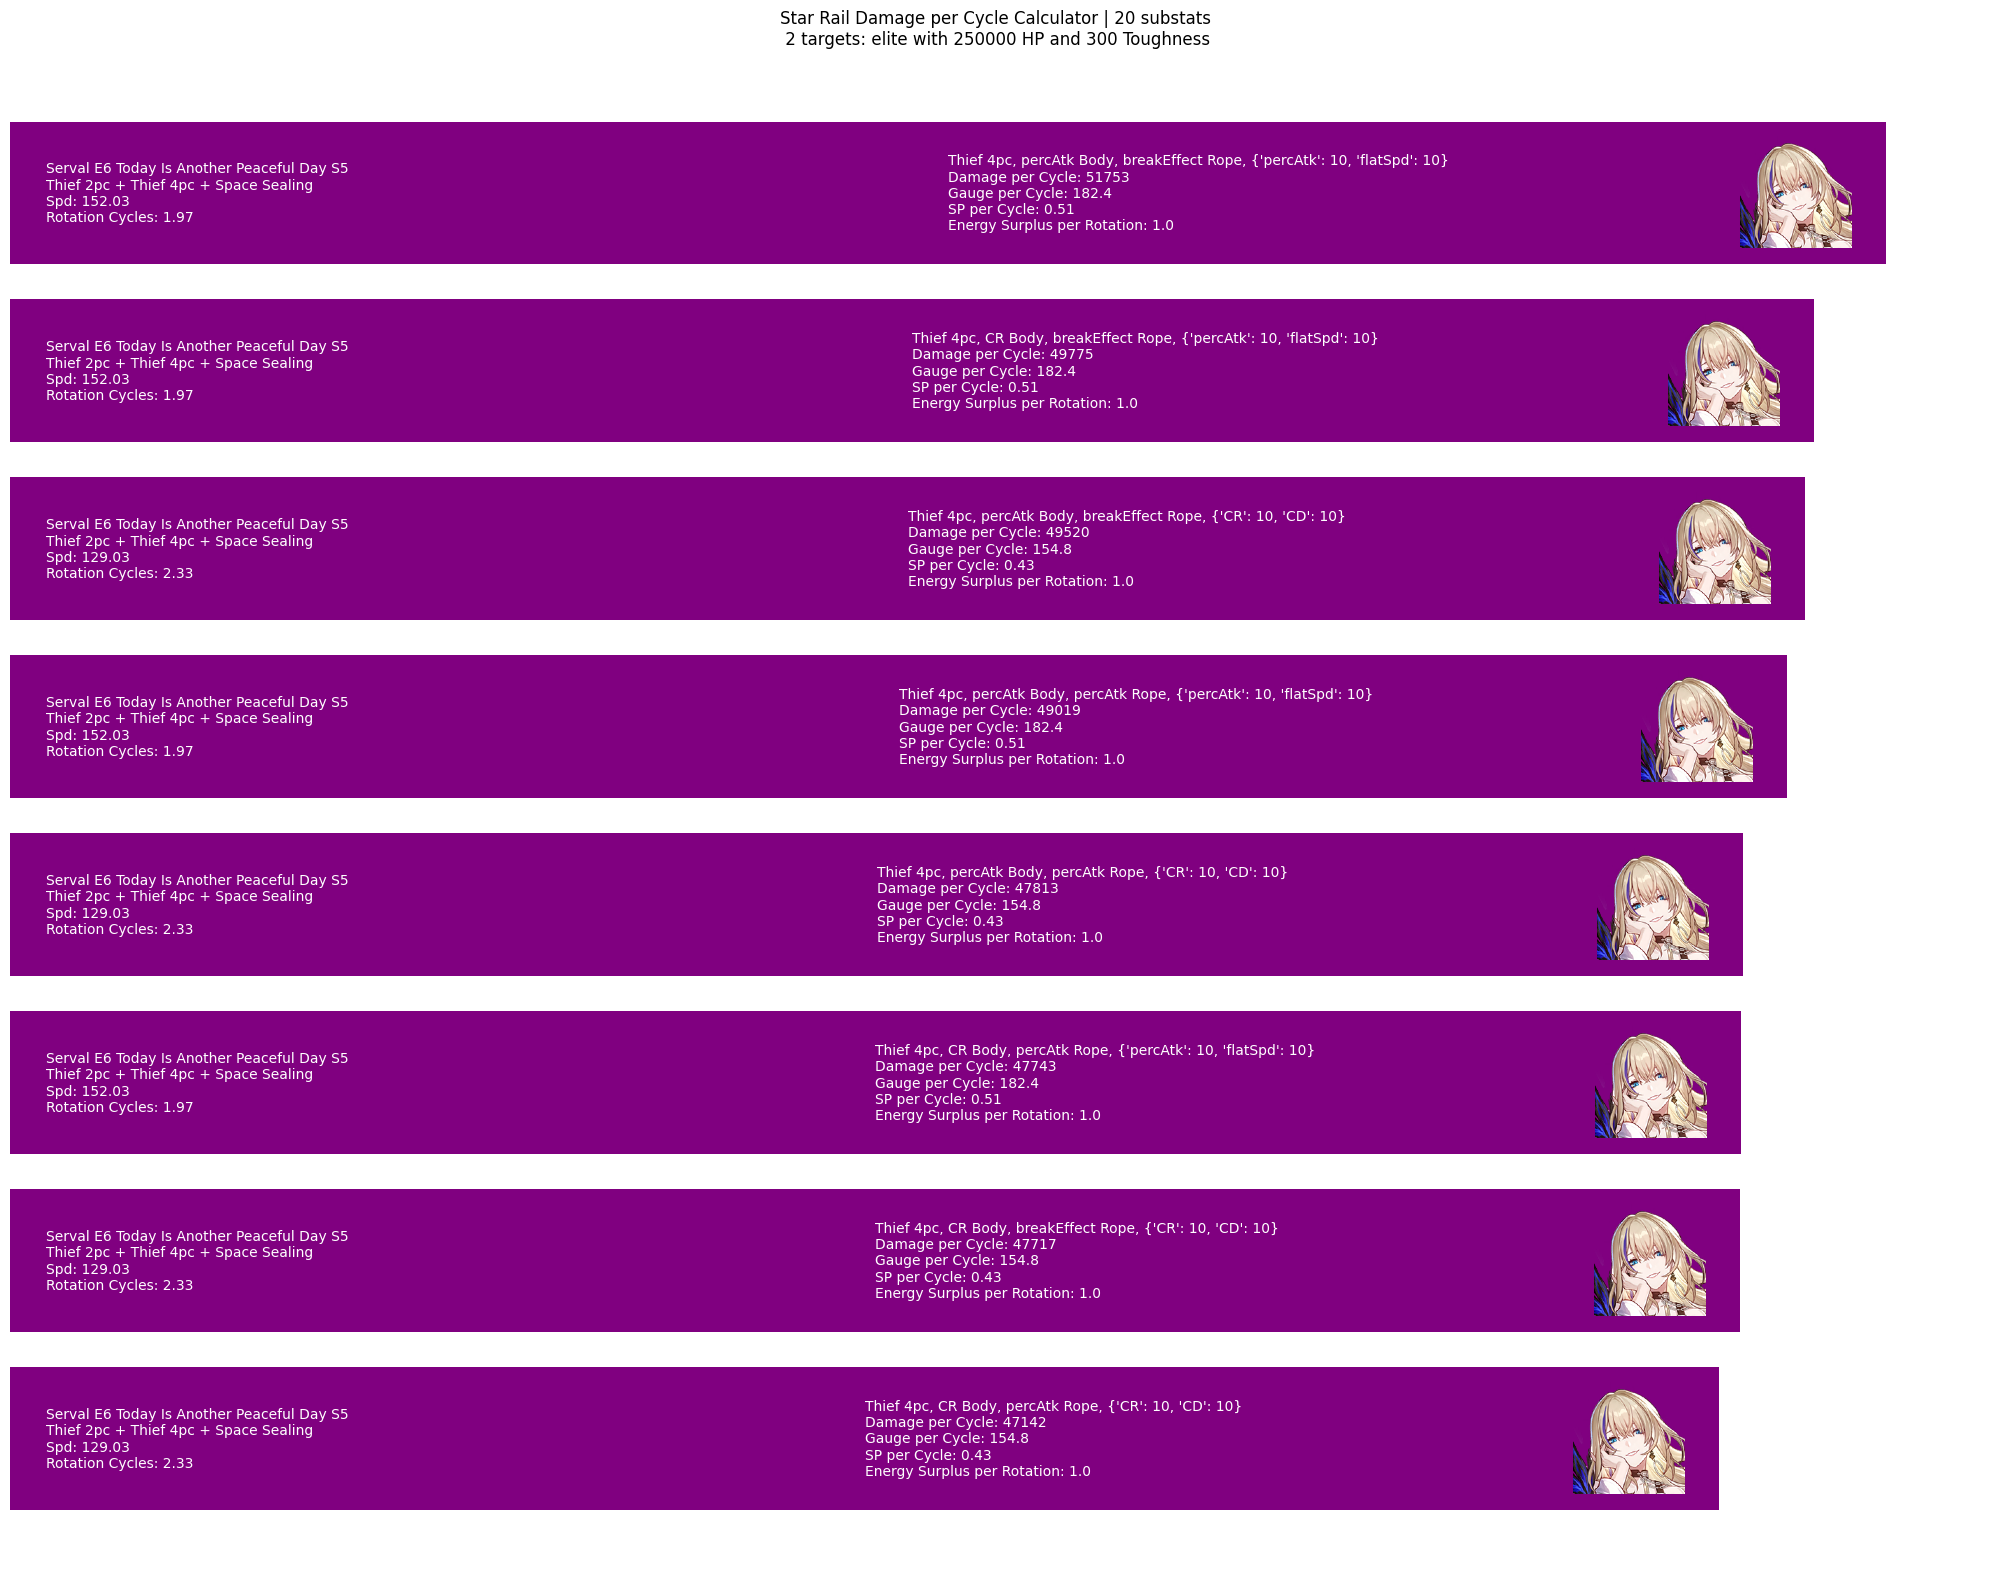

In [2]:
# First, Compare Serval Substats
# Note this is assumes random distribution of who triggers toughness break!
# First, lets evaluate crit vs break build on thief set

CharacterDict = {} # store character information here
EffectDict = {} # store dps metrics here

config = copy(Configuration)

relicsetone = ThiefOfShootingMeteor2pc()
relicsettwo = ThiefOfShootingMeteor4pc()
def iterator():
        for rope in ['percAtk','breakEffect']:
                for body in ['percAtk', 'CR']:
                        for substats in [{'CR':10, 'CD':10},
                                        {'percAtk':10, 'flatSpd':10},]:
                                yield rope, body, substats

for rope, body, substats in iterator():
        ServalCharacter = Serval(relicstats = RelicStats(mainstats = [rope, 'flatSpd', body, 'lighDmg'],
                                substats = substats),
                lightcone = TheSeriousnessOfBreakfast(stacks=3,**config),
                relicsetone = relicsetone, relicsettwo = relicsettwo, planarset = SpaceSealingStation(),
                **config)

        ServalRotation = [
                ServalCharacter.useBasic(shocked=True),
                ServalCharacter.useSkill(shocked=True) * 2,
                ServalCharacter.useUltimate(shocked=True),
        ]
        DefaultEstimator('{}, {} Body, {} Rope, {}'.format(relicsettwo.shortname, body, rope, substats), 
                         ServalRotation, ServalCharacter, config, CharacterDict, EffectDict, breakDotMode='alwaysAll') 
        # set breakDotMode to always because Serval can extend dots

visualize(CharacterDict, EffectDict, **config)

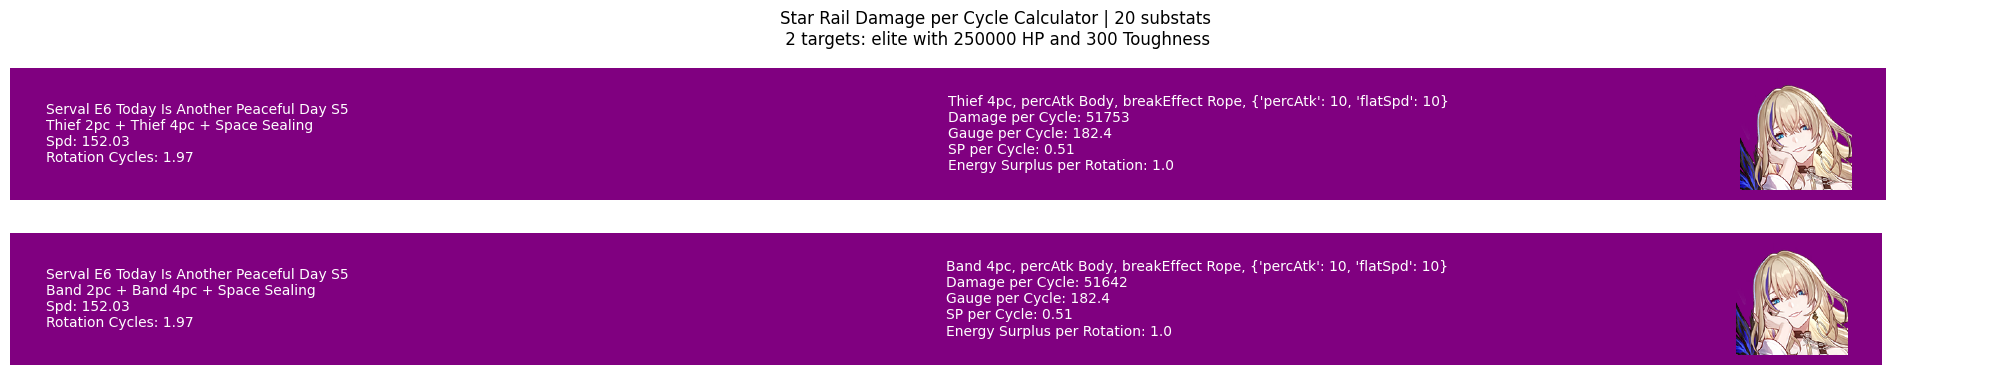

In [3]:
# second, let's evaluate which sets we want

CharacterDict = {} # store character information here
EffectDict = {} # store dps metrics here

config = copy(Configuration)

rope = 'breakEffect'
body = 'percAtk'
substats = {'percAtk':10, 'flatSpd':10}
def iterator():
        for relicsetone, relicsettwo in [(ThiefOfShootingMeteor2pc(), ThiefOfShootingMeteor4pc()),
                                         (BandOfSizzlingThunder2pc(), BandOfSizzlingThunder4pc())]:
                yield relicsetone, relicsettwo

for relicsetone, relicsettwo in iterator():
        ServalCharacter = Serval(relicstats = RelicStats(mainstats = [rope, 'flatSpd', body, 'lighDmg'],
                                substats = substats),
                lightcone = TheSeriousnessOfBreakfast(stacks=3,**config),
                relicsetone = relicsetone, relicsettwo = relicsettwo, planarset = SpaceSealingStation(),
                **config)

        ServalRotation = [
                ServalCharacter.useBasic(shocked=True),
                ServalCharacter.useSkill(shocked=True) * 2,
                ServalCharacter.useUltimate(shocked=True),
        ]
        DefaultEstimator('{}, {} Body, {} Rope, {}'.format(relicsettwo.shortname, body, rope, substats), 
                         ServalRotation, ServalCharacter, config, CharacterDict, EffectDict, breakDotMode='alwaysAll') 
        # set breakDotMode to always because Serval can extend dots

visualize(CharacterDict, EffectDict, **config)

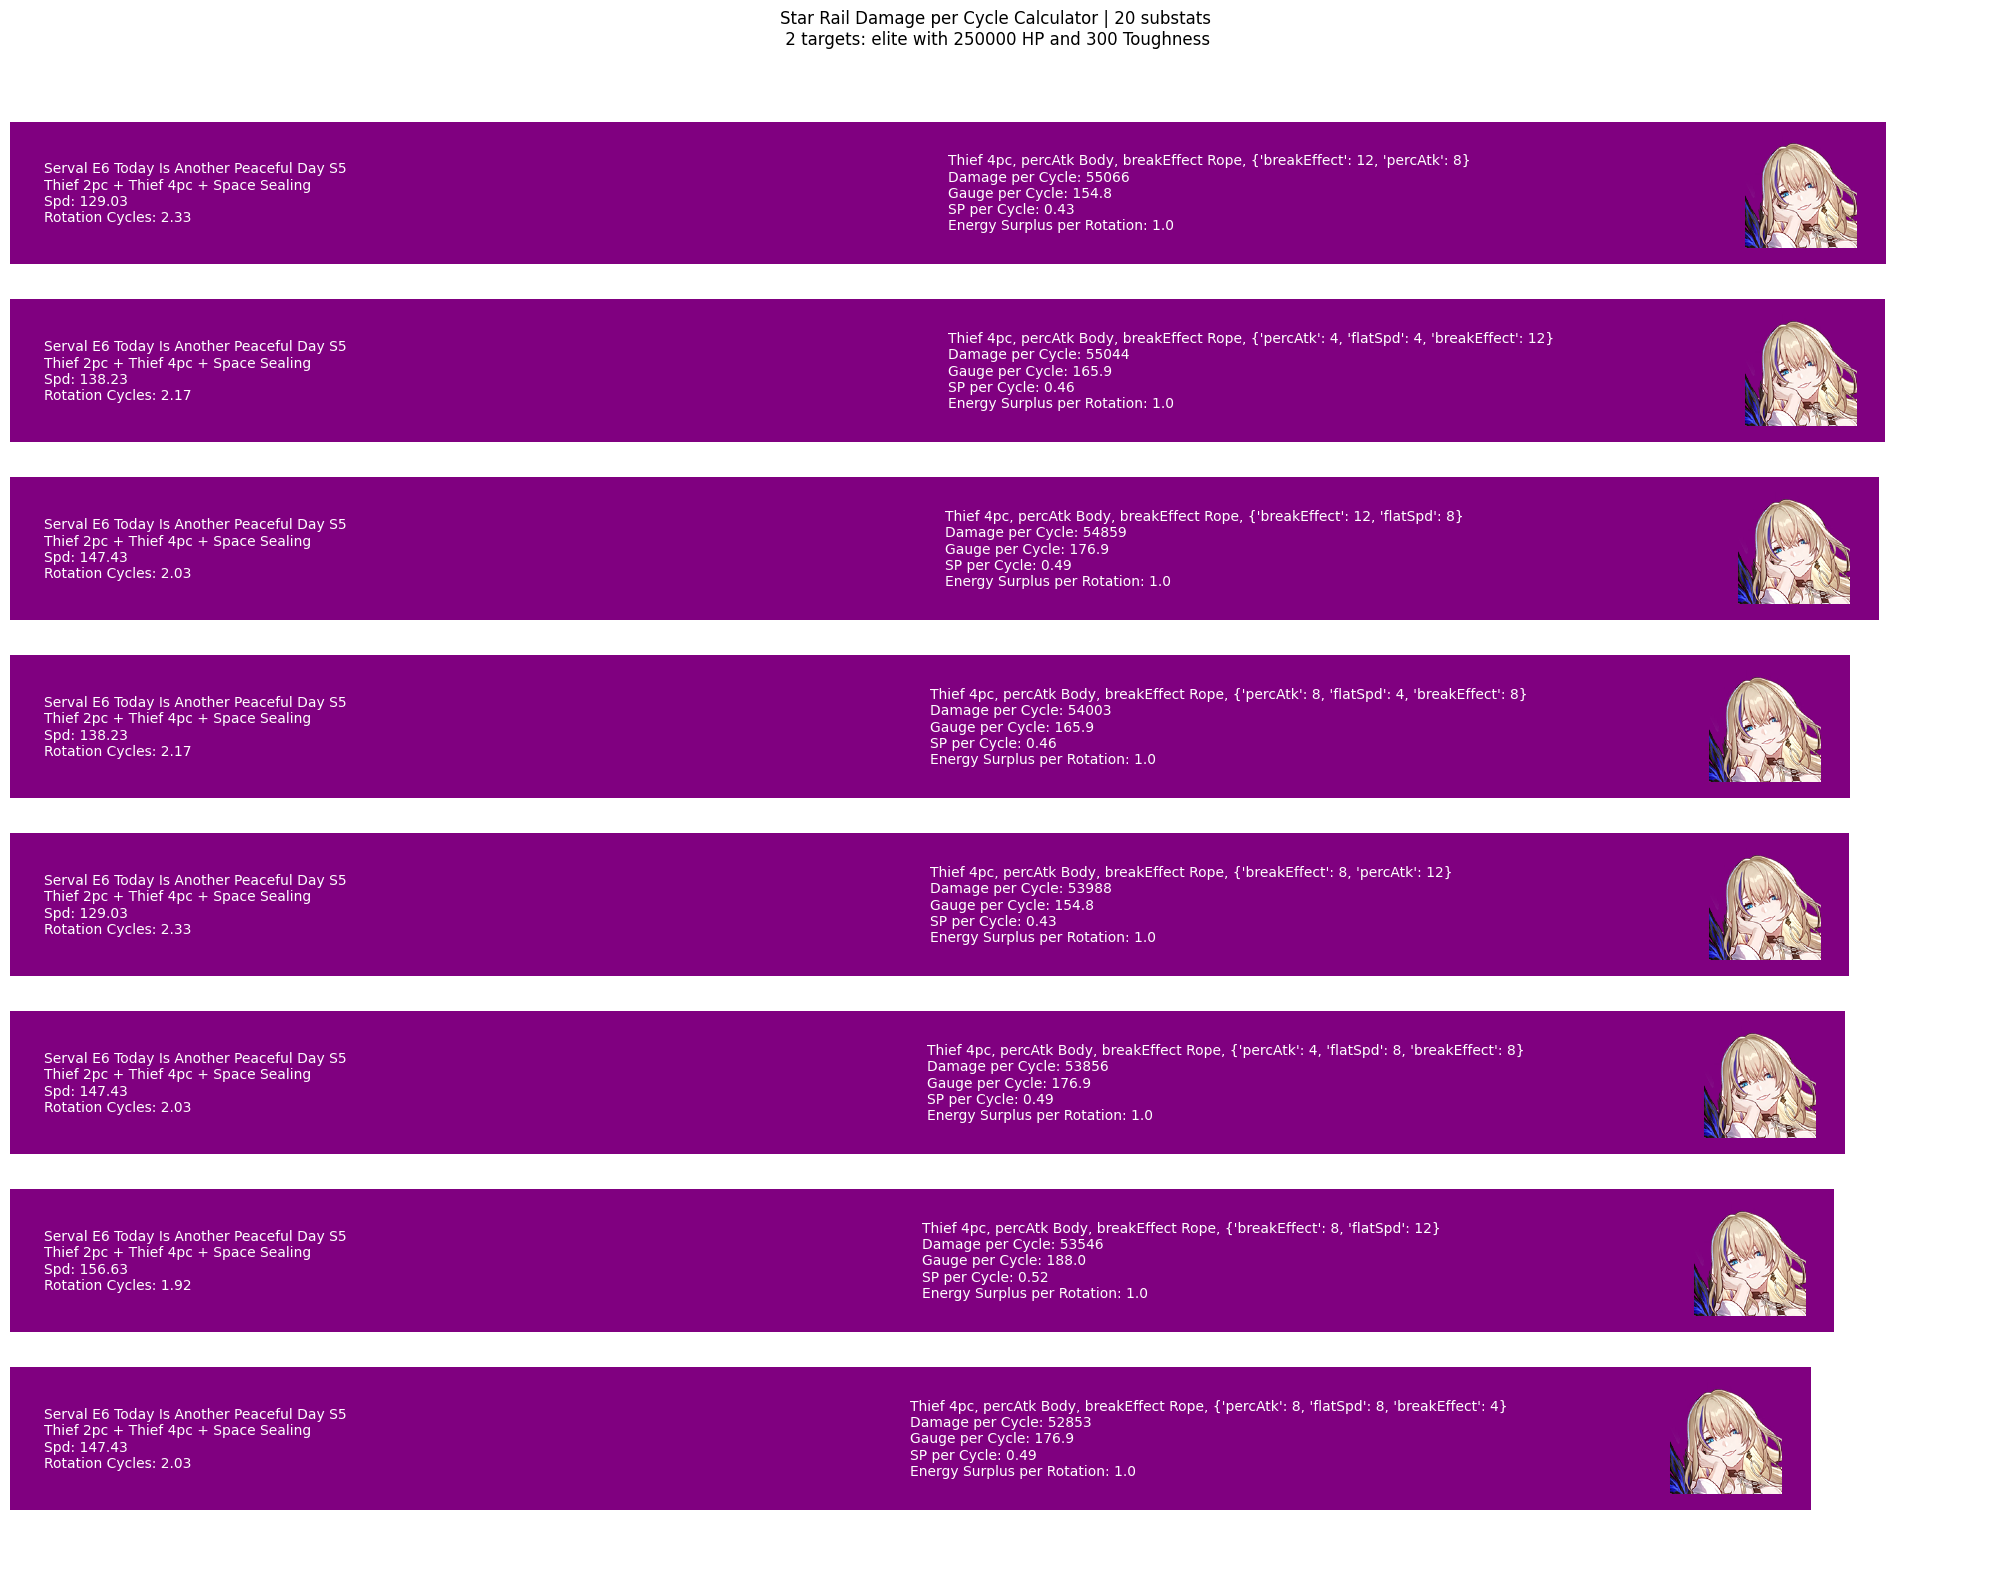

In [4]:
# third, let's evaluate which substats we want the most

CharacterDict = {} # store character information here
EffectDict = {} # store dps metrics here

config = copy(Configuration)

rope = 'breakEffect'
body = 'percAtk'
relicsetone = ThiefOfShootingMeteor2pc()
relicsettwo = ThiefOfShootingMeteor4pc()
def iterator():
        for substats in [{'percAtk':4, 'flatSpd':8, 'breakEffect':8},
                         {'percAtk':8, 'flatSpd':4, 'breakEffect':8},
                         {'percAtk':8, 'flatSpd':8, 'breakEffect':4},
                         {'percAtk':4, 'flatSpd':4, 'breakEffect':12},
                         {'breakEffect':12, 'flatSpd':8},
                         {'breakEffect':8, 'flatSpd':12},
                         {'breakEffect':12, 'percAtk':8},
                         {'breakEffect':8, 'percAtk':12},]:
                yield substats

for substats in iterator():
        ServalCharacter = Serval(relicstats = RelicStats(mainstats = [rope, 'flatSpd', body, 'lighDmg'],
                                substats = substats),
                lightcone = TheSeriousnessOfBreakfast(stacks=3,**config),
                relicsetone = relicsetone, relicsettwo = relicsettwo, planarset = SpaceSealingStation(),
                **config)

        ServalRotation = [
                ServalCharacter.useBasic(shocked=True),
                ServalCharacter.useSkill(shocked=True) * 2,
                ServalCharacter.useUltimate(shocked=True),
        ]
        DefaultEstimator('{}, {} Body, {} Rope, {}'.format(relicsettwo.shortname, body, rope, substats), 
                         ServalRotation, ServalCharacter, config, CharacterDict, EffectDict, breakDotMode='alwaysAll') 
        # set breakDotMode to always because Serval can extend dots

visualize(CharacterDict, EffectDict, **config)

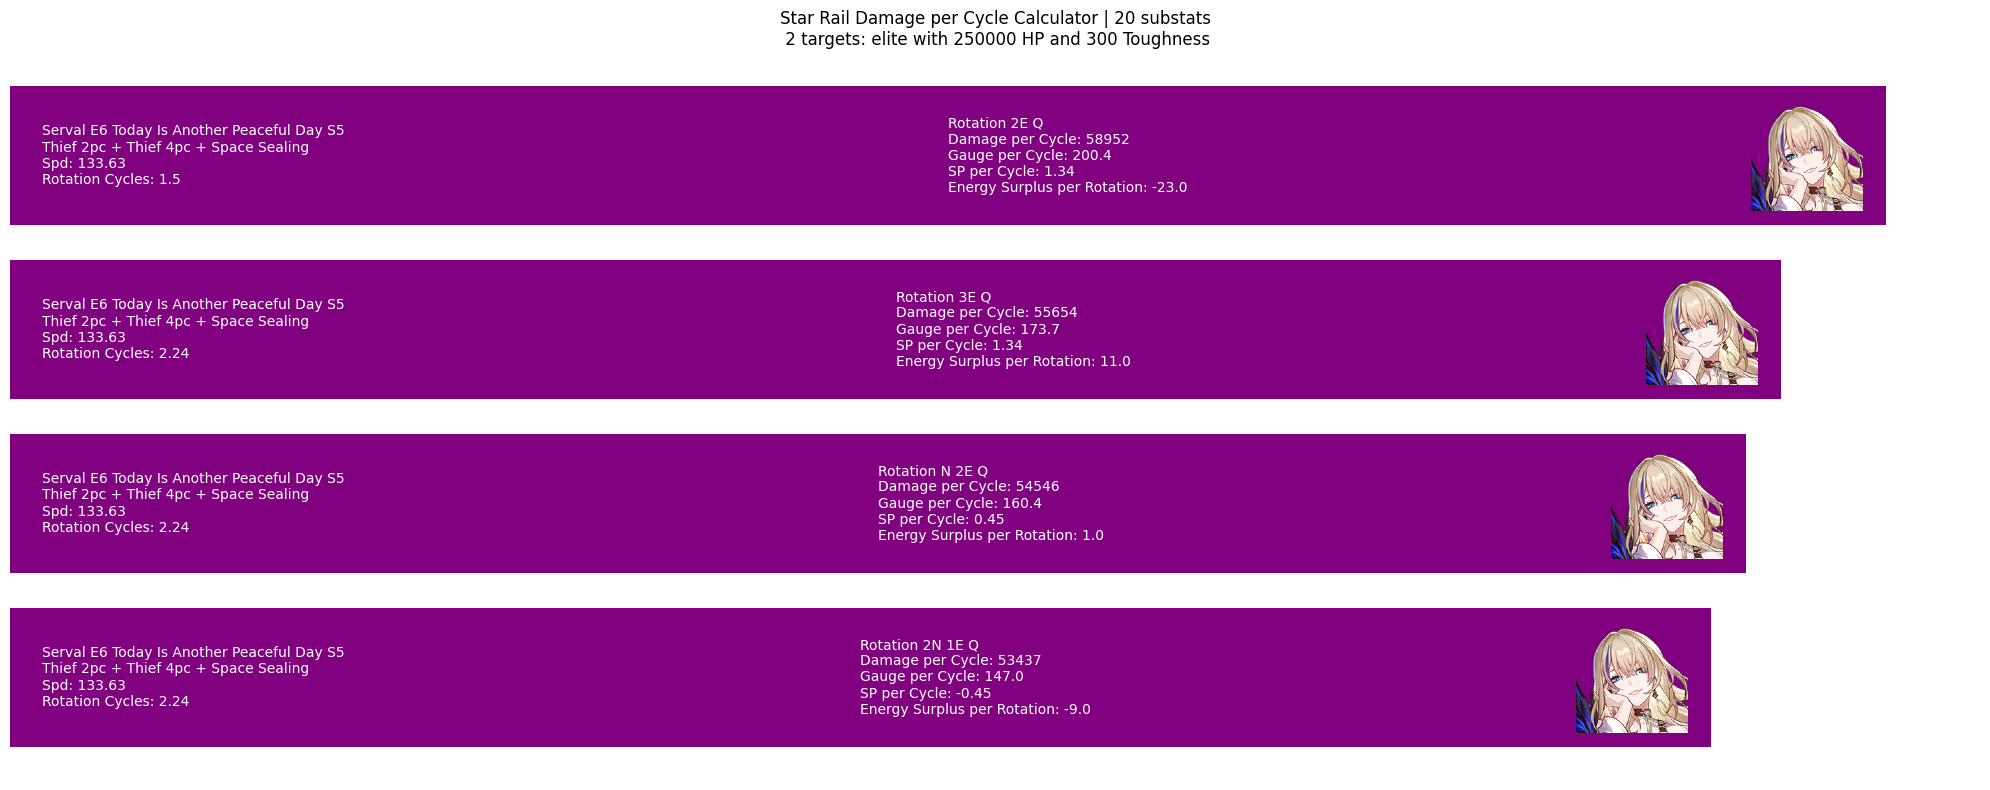

In [15]:
# Finally, lets look at different rotations

CharacterDict = {} # store character information here
EffectDict = {} # store dps metrics here

config = copy(Configuration)

def iterator():
    for rotationName, rotation in  [
        ('Rotation N 2E Q',
            [ServalCharacter.useBasic(shocked=True),
            ServalCharacter.useSkill(shocked=True) * 2,
            ServalCharacter.useUltimate(shocked=True),]),
        ('Rotation 3E Q',
            [ServalCharacter.useSkill(shocked=True) * 3,
            ServalCharacter.useUltimate(shocked=True),]),
        ('Rotation 2E Q',
            [ServalCharacter.useSkill(shocked=True) * 2,
            ServalCharacter.useUltimate(shocked=True),]),
        ('Rotation 2N 1E Q',
            [ServalCharacter.useBasic(shocked=True) * 2,
            ServalCharacter.useSkill(shocked=True),
            ServalCharacter.useUltimate(shocked=True),]),
        ]:
        yield rotationName, rotation

for rotationName, ServalRotation in iterator():
        ServalCharacter = Serval(relicstats = RelicStats(mainstats = ['breakEffect', 'flatSpd', 'percAtk', 'lighDmg'],
                                substats = {'percAtk':8, 'flatSpd':2, 'breakEffect':10}),
                lightcone = TheSeriousnessOfBreakfast(stacks=3,**config),
                relicsetone = ThiefOfShootingMeteor2pc(), relicsettwo = ThiefOfShootingMeteor4pc(), planarset = SpaceSealingStation(),
                **config)

        DefaultEstimator('{}'.format(rotationName), 
                         ServalRotation, ServalCharacter, config, CharacterDict, EffectDict, breakDotMode='alwaysAll') 
        # set breakDotMode to always because Serval can extend dots

visualize(CharacterDict, EffectDict, **config)